In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# corners are 4-by-2 arrays, representing the four image corner (x, y) pairs
def transform(img, canvas, corners):
    h, w, ch = img.shape
    orig_corner = np.array([[0, 0], [w, 0], [0, h], [w, h]])
    matrix = solve_homography(orig_corner, corners)

    # apply matrix to every point
    for i in range(h):
        for j in range(w):
            tmp = np.dot(matrix, np.array([[j, i, 1]]).T)
            x, y = int(tmp[0][0] / tmp[2][0]), int(tmp[1][0] / tmp[2][0])
            canvas[y][x] = img[i][j]
         
    return canvas

In [4]:
# u, v are N-by-2 matrices, representing N corresponding points for v = T(u)
# this function should return a 3-by-3 homography matrix
def solve_homography(u, v):
    N = u.shape[0]
    if v.shape[0] is not N:
        print('u and v should have the same size')
        return None
    if N < 4:
        print('At least 4 points should be given')

    A = np.array([[u[0][0], u[0][1], 1, 0, 0, 0, -1 * u[0][0] * v[0][0], -1 * u[0][1] * v[0][0], -1 * v[0][0]],
                  [0, 0, 0, u[0][0], u[0][1], 1, -1 * u[0][0] * v[0][1], -1 * u[0][1] * v[0][1], -1 * v[0][1]],
                  [u[1][0], u[1][1], 1, 0, 0, 0, -1 * u[1][0] * v[1][0], -1 * u[1][1] * v[1][0], -1 * v[1][0]],
                  [0, 0, 0, u[1][0], u[1][1], 1, -1 * u[1][0] * v[1][1], -1 * u[1][1] * v[1][1], -1 * v[1][1]],
                  [u[2][0], u[2][1], 1, 0, 0, 0, -1 * u[2][0] * v[2][0], -1 * u[2][1] * v[2][0], -1 * v[2][0]],
                  [0, 0, 0, u[2][0], u[2][1], 1, -1 * u[2][0] * v[2][1], -1 * u[2][1] * v[2][1], -1 * v[2][1]],
                  [u[3][0], u[3][1], 1, 0, 0, 0, -1 * u[3][0] * v[3][0], -1 * u[3][1] * v[3][0], -1 * v[3][0]],
                  [0, 0, 0, u[3][0], u[3][1], 1, -1 * u[3][0] * v[3][1], -1 * u[3][1] * v[3][1], -1 * v[3][1]]
                ])

    matrixA = np.matrix(A)

    #svd composition
    u, s, v = np.linalg.svd(matrixA)

    #reshape the min singular value into a 3 by 3 matrix
    H = np.reshape(v[8], (3, 3))

    print(H)
    return H

In [5]:
def main():
    
    canvas = cv2.imread('/content/room.jpg')
    img1 = cv2.imread('/content/room.jpg')

    # five target corners
    corners = np.array([[538, 300], [690, 294], [538, 384], [688, 390]])

    # map five images to the target surface
    canvas = transform(img1, canvas, corners)
    cv2.imwrite('result.jpg', canvas)
    plt.imshow(canvas)
    plt.show()

[[-1.13165025e-04 -1.45029306e-05 -8.73389256e-01]
 [ 7.45171807e-05 -2.04604538e-04 -4.87020031e-01]
 [ 2.18063843e-07 -2.69571200e-08 -1.62340010e-03]]


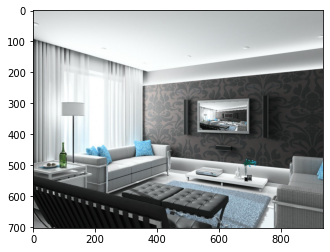

In [6]:
if __name__ == '__main__':
    main()